In [1]:
#pip install imblearn

## Import packages


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Import data

In [3]:
file1 = 'Flight-Level-False-Pos-Data_160920.csv'

df1 = pd.read_csv(file1)
df1 = df1.set_index('flight_record')
df1 = df1.drop(columns = ['airframe', 'fleet'])
df1.head()

,flight_date_exact,tail_number,takeoff_airport_code,landing_airport_code,p14_event_record,p14_event_type,p14_severity,p14_false_positive,p14_start_of_event_10_seconds_seconds_from_start_of_file,p14_end_of_event_10_seconds_seconds_from_start_of_file,p14_data_dropouts_seconds,p14_error_b_w_gmt_and_recorded_time_around_event_percent,p14_estimated_nav_error_at_start_of_event_nm,p14_standard_deviation_of_sample_rate_of_gmt_event_interval_30_seconds_hz,p14_flap_handle_position_at_start_of_event,p14_speed_brake_handle_position_at_start_of_event_deg,p14_flap_position_at_start_of_event_deg_ted,target
flight_record,,,,,,,,,,,,,,,,,,
2869387,25/02/2020 6:13,VH-VXD,YPPH,YPAD,40509975,Airborne Speed High,Level 2,Not a False Positive,609.00,629.00,0.0,-0.000095,0.024290,0,5.0,0.641989,5.203770,0
2869366,25/02/2020 7:03,VH-VYF,YMML,YSSY,40509984,High Vertical Acceleration at landing,Level 2,Not a False Positive,5611.25,5637.25,2.0,-0.000436,0.038936,0,30.0,4.200743,30.009817,0
2869228,25/02/2020 3:32,VH-XZN,YNWN,YPPH,40510130,Airborne Speed High,Level 2,Not a False Positive,688.00,708.00,0.0,-0.000095,0.009928,0,10.0,-1.286268,10.302753,0
2869620,25/02/2020 17:05,VH-VZK,NZAA,YMML,40510312,Pitch Attitude High During Rotation (Gears Ext...,Level 2,Not a False Positive,662.00,682.00,0.0,-0.001526,0.032998,0,1.0,-1.194254,1.030449,0
2868605,24/02/2020 17:17,VH-XZG,NZCH,YSSY,40511060,TCAS Resolution Advisory,Level 2,Not a False Positive,10624.00,10663.00,2.0,-0.001691,0.008319,0,5.0,-1.654518,5.180016,0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 2869387 to 2953028
Data columns (total 18 columns):
flight_date_exact                                                            2396 non-null object
tail_number                                                                  2396 non-null object
takeoff_airport_code                                                         2396 non-null object
landing_airport_code                                                         2396 non-null object
p14_event_record                                                             2396 non-null int64
p14_event_type                                                               2396 non-null object
p14_severity                                                                 2396 non-null object
p14_false_positive                                                           2396 non-null object
p14_start_of_event_10_seconds_seconds_from_start_of_file                     2395 non-null float64
p1

In [5]:
df1.describe()

,p14_event_record,p14_start_of_event_10_seconds_seconds_from_start_of_file,p14_end_of_event_10_seconds_seconds_from_start_of_file,p14_data_dropouts_seconds,p14_error_b_w_gmt_and_recorded_time_around_event_percent,p14_estimated_nav_error_at_start_of_event_nm,p14_standard_deviation_of_sample_rate_of_gmt_event_interval_30_seconds_hz,p14_flap_handle_position_at_start_of_event,p14_speed_brake_handle_position_at_start_of_event_deg,p14_flap_position_at_start_of_event_deg_ted,target
count,2.396000e+03,2395.000000,2395.000000,2392.000000,2395.000000,2395.000000,2396.0,2395.000000,2395.000000,2395.000000,2396.000000
mean,4.069713e+07,2922.989457,3163.754906,2.179870,1.234591,0.037107,0.0,9.941127,0.773515,9.685493,0.113523
std,1.102973e+05,3774.963355,4027.053917,3.618313,18.158764,0.079871,0.0,11.711527,4.995767,11.296350,0.317297
min,4.050998e+07,64.000000,88.000000,0.000000,-3.333366,0.000362,0.0,0.000000,-2.115266,0.000000,0.000000
25%,4.059701e+07,545.500000,570.000000,0.000000,-0.000213,0.011710,0.0,1.000000,-1.286268,1.016928,0.000000
50%,4.069857e+07,857.000000,891.000000,2.000000,-0.000095,0.025609,0.0,5.000000,-0.826390,5.090937,0.000000
75%,4.079162e+07,4571.500000,4876.250000,2.000000,0.000354,0.040438,0.0,10.000000,0.458710,10.302753,0.000000
max,4.100004e+07,22080.000000,22100.000000,43.000000,339.999580,1.481835,0.0,40.000000,45.260445,40.000000,1.000000


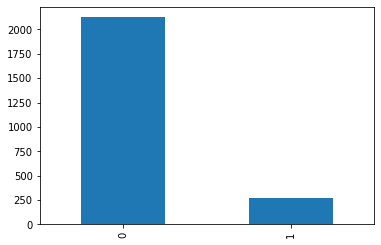

In [6]:
df1["target"].value_counts().plot.bar()

In [7]:
df1[pd.isnull(df1).any(axis=1)]

,flight_date_exact,tail_number,takeoff_airport_code,landing_airport_code,p14_event_record,p14_event_type,p14_severity,p14_false_positive,p14_start_of_event_10_seconds_seconds_from_start_of_file,p14_end_of_event_10_seconds_seconds_from_start_of_file,p14_data_dropouts_seconds,p14_error_b_w_gmt_and_recorded_time_around_event_percent,p14_estimated_nav_error_at_start_of_event_nm,p14_standard_deviation_of_sample_rate_of_gmt_event_interval_30_seconds_hz,p14_flap_handle_position_at_start_of_event,p14_speed_brake_handle_position_at_start_of_event_deg,p14_flap_position_at_start_of_event_deg_ted,target
flight_record,,,,,,,,,,,,,,,,,,
2822809,7/01/2020 6:37,VH-VYG,YPPH,YPAD,40550353,Pitch Attitude High During Landing (Gears Comp...,Level 2,Bad Parameter: Bad Sensor on Airplane,NaN,NaN,0.0,-0.040611,NaN,0,NaN,NaN,NaN,1
2712553,16/09/2019 1:20,VH-XZL,YPAD,UNKNOWN,40645728,High Speed Rejected Takeoff,Level 2,Not a False Positive,394.00,433.75,NaN,-0.000185,0.015276,0,1.0,-1.194254,1.007913,0
2676998,6/08/2019 5:54,VH-XZN,YMML,UNKNOWN,40674511,High Speed Rejected Takeoff,Level 2,Not a False Positive,913.00,976.00,NaN,-0.000403,0.037157,0,5.0,-1.470355,5.156261,0
2540399,7/03/2019 7:13,VH-VXR,YBBN,UNKNOWN,40763435,High Speed Rejected Takeoff,Level 2,Not a False Positive,465.00,511.00,NaN,-0.000193,0.020267,0,5.0,-1.286268,4.979736,0
2540434,7/03/2019 7:37,VH-VXA,YPAD,UNKNOWN,40763467,High Speed Rejected Takeoff,Level 2,Not a False Positive,402.00,445.00,NaN,0.000555,0.022926,0,1.0,-0.458835,1.021435,0
2452026,24/11/2018 20:35,VH-VYZ,YPAD,YBBN,40809511,Pitch Attitude High During Rotation (Gears Ext...,Level 2,Not a False Positive,478.75,498.75,0.0,NaN,0.035187,0,1.0,-0.734472,1.034957,0


In [8]:
df1.isnull().sum()

flight_date_exact                                                            0
tail_number                                                                  0
takeoff_airport_code                                                         0
landing_airport_code                                                         0
p14_event_record                                                             0
p14_event_type                                                               0
p14_severity                                                                 0
p14_false_positive                                                           0
p14_start_of_event_10_seconds_seconds_from_start_of_file                     1
p14_end_of_event_10_seconds_seconds_from_start_of_file                       1
p14_data_dropouts_seconds                                                    4
p14_error_b_w_gmt_and_recorded_time_around_event_percent                     1
p14_estimated_nav_error_at_start_of_event_nm        

import missingno as msno
msno.matrix(df1)

## label encoding

In [9]:
df1['p14_severity'].unique()


array(['Level 2', 'Level 3'], dtype=object)

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Level 2','Level 3'])
df1['p14_severity'] = le.transform(df1['p14_severity'])

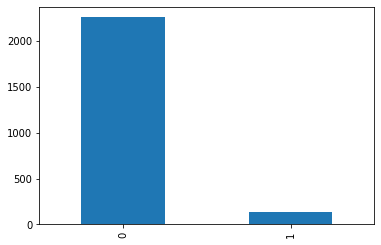

In [11]:
df1['p14_severity'].value_counts().plot.bar()

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Airborne Speed High', 'High Vertical Acceleration at landing',
       'Pitch Attitude High During Rotation (Gears Extended)',
       'TCAS Resolution Advisory', 'Rotation Speed High',
       'Climb Speed Low', 'GPWS: Windshear Warning', 'Deep Touchdown',
       'High Speed Below 5000 ft AAL', 'Pitch Rate Low during Rotation',
       'Approach Speed High Below 50 ft AGL (Vref)', 'GPWS: Sink Rate',
       'Late Land Flap Selection', 'MMO Exceedance',
       'Thrust reversers delayed during landing',
       'Speed Brakes Used During Final Approach', 'Climb Speed High',
       'VFE (Flap Airspeed Limit) Exceedance',
       'Below Minimum Maneuver Speed', 'Rotation Speed Low',
       'High Bank Angle Descent Below 200 feet', 'Idle Thrust Approach',
       'Deviation Above GlideSlope 500 to 200 ft AGL',
       'Early Flap Retraction', 'Airspeed Low Relative to Stall Speed',
       'High Bank Angle Climb below 200 feet', 'Short touchdown',
       'Stick shaker', 'GPWS: Pull Up', 'Short Runway Distance Remaining',
       'Pitch Attitude High During Landing (Gears Compressed)',
       'FLCH  mode below 1000 ft HAT', "GPWS: Don't Sink",
       'High Speed Below 3000 ft AAL',
       'High Rate of Descent 1000 ft HAT -> 500 HAT',
       'GPWS: Too Low Terrain', 'GPWS: Too Low Flap',
       'High Bank Angle on Flare', 'GPWS: Glideslope',
       'Altitude Excursion', 'GPWS: Terrain', 'GPWS: Terrain Pull Up',
       'GPWS: Too Low Gear',
       'Deviation Below GlideSlope 500 to 200 ft AGL',
       'High Speed Rejected Takeoff',
       'High Bank Angle Climb 200ft to 1000 ft', 'VMO Exceedance',
       'Landing with incorrect flap', 'GPWS: Look Ahead Caution'])
df1['p14_event_type'] = le.transform(df1['p14_event_type'])

In [13]:
df1.columns.tolist()

['flight_date_exact',
 'tail_number',
 'takeoff_airport_code',
 'landing_airport_code',
 'p14_event_record',
 'p14_event_type',
 'p14_severity',
 'p14_false_positive',
 'p14_start_of_event_10_seconds_seconds_from_start_of_file',
 'p14_end_of_event_10_seconds_seconds_from_start_of_file',
 'p14_data_dropouts_seconds',
 'p14_error_b_w_gmt_and_recorded_time_around_event_percent',
 'p14_estimated_nav_error_at_start_of_event_nm',
 'p14_standard_deviation_of_sample_rate_of_gmt_event_interval_30_seconds_hz',
 'p14_flap_handle_position_at_start_of_event',
 'p14_speed_brake_handle_position_at_start_of_event_deg',
 'p14_flap_position_at_start_of_event_deg_ted',
 'target']

In [14]:
features = [
 #'flight_date_exact',
 #'tail_number',
 #'takeoff_airport_code',
 #'landing_airport_code',
 #'p14_event_record',
 'p14_event_type',
 'p14_severity',
 #'p14_false_positive',
 'p14_start_of_event_10_seconds_seconds_from_start_of_file',
 'p14_end_of_event_10_seconds_seconds_from_start_of_file',
 'p14_data_dropouts_seconds',
 'p14_error_b_w_gmt_and_recorded_time_around_event_percent',
 'p14_estimated_nav_error_at_start_of_event_nm',
 'p14_standard_deviation_of_sample_rate_of_gmt_event_interval_30_seconds_hz',
 'p14_flap_handle_position_at_start_of_event',
 'p14_speed_brake_handle_position_at_start_of_event_deg',
 'p14_flap_position_at_start_of_event_deg_ted'
]

X = df1[features]
y = df1['target']

## imputing null values

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

X = StandardScaler().fit(X).transform(X)
X = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit(X).transform(X)

## train test split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [17]:
y_train.shape


(1677,)

In [18]:
y_test.shape

(719,)

## Resampling

**Python imbalanced-learn module**

#import imblearn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_train, y_train)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X_train, y_train)

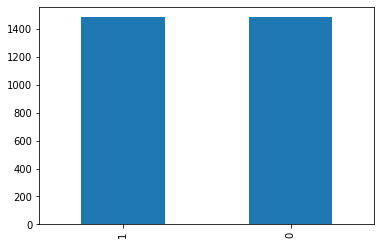

In [20]:
y_sm.value_counts().plot.bar()

## modelling

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()



## Hyperparameter tuning

In [22]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [23]:
from sklearn.model_selection import RandomizedSearchCV

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}


## training

In [24]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_sm, y_sm)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   52.1s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, verbose=2)

#clf.fit(X_ros,y_ros)
clf.fit(X_sm, y_sm )

In [25]:
rf_random.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [26]:
best_random = rf_random.best_estimator_
best_random

RandomForestClassifier(max_depth=30)

## Evaluation

In [27]:
actual = y_test

prob_1 = best_random.predict_proba(X_test)[:,1]

evaluate = pd.DataFrame({"actual": actual
                        , "prob_1": prob_1
                        })
threshold = 0.5

evaluate["predictions"] = (evaluate["prob_1"] > threshold) *1

print((evaluate["actual"]==evaluate["predictions"]).mean())
evaluate

0.9777468706536857


,actual,prob_1,predictions
flight_record,,,
2705562,0,0.00,0
2784781,0,0.21,0
2660587,0,0.00,0
2830398,0,0.17,0
2518136,0,0.00,0
...,...,...,...
2449851,0,0.01,0
2680600,0,0.00,0
2453316,0,0.09,0


## probability/distribution plot

[]

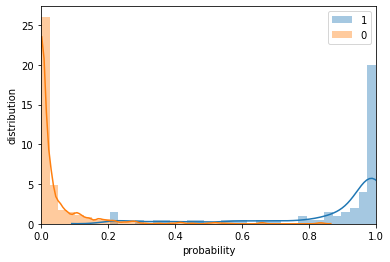

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

x = evaluate[evaluate['actual']==1].prob_1
y = evaluate[evaluate['actual']==0].prob_1

bins = np.linspace(0,1,40)

sns.distplot(x, bins=bins, label='1')
sns.distplot(y, bins=bins, label='0')
plt.xlim(0,1)
plt.xlabel('probability')
plt.ylabel('distribution')
plt.legend()
plt.plot()

## Classification report

In [29]:
from sklearn.metrics import classification_report

# Predict the labels of the test set
y_pred = best_random.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))
#print("Accuracy: {}".format(cv.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       641
           1       0.90      0.90      0.90        78

    accuracy                           0.98       719
   macro avg       0.94      0.94      0.94       719
weighted avg       0.98      0.98      0.98       719



**interpretaion**
- Recall – What percent of the positive cases did you catch? 
- Precision – What percent of your predictions were correct?
- F1 score – What percent of positive predictions were correct? 
    - the harmonic mean between precision & recall
- The support is the number of occurence of the given class in your dataset

## Confusion matrix

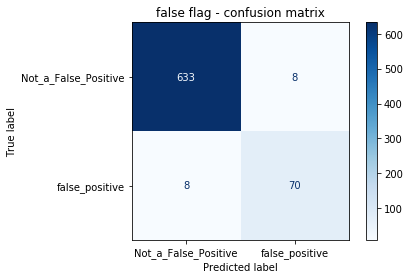

In [30]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(best_random, X_test,y_test, cmap=plt.cm.Blues,display_labels=dict(Not_a_False_Positive=0,false_positive=1))
disp.ax_.set_title("false flag - confusion matrix")
plt.show()

## ROC Curve

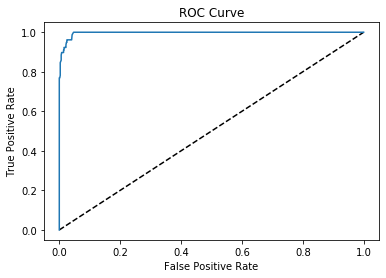

In [31]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = best_random.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## feature importance

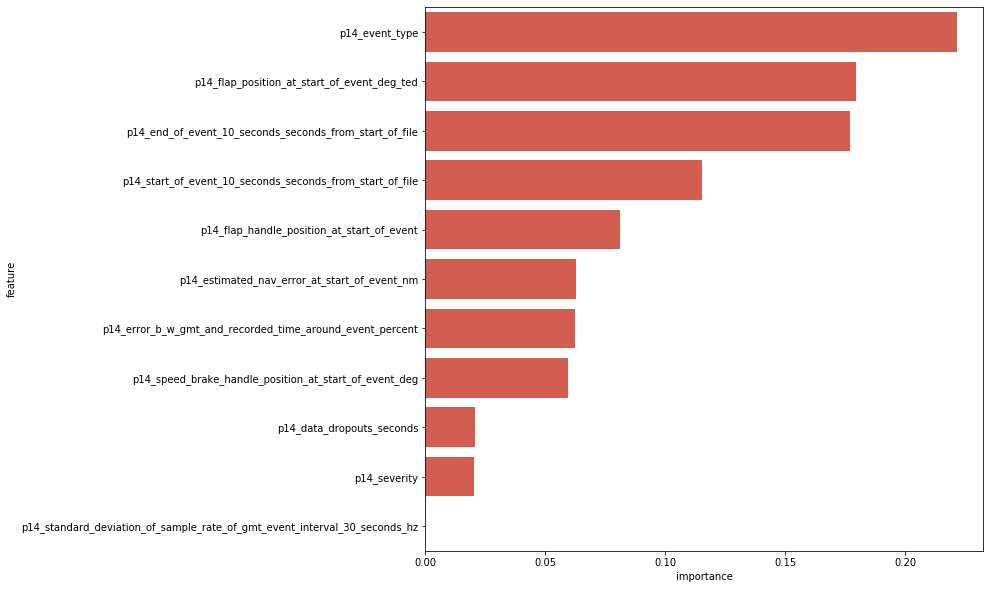

,feature,importance,cum_sum
0,p14_event_type,0.221567,0.221567
1,p14_flap_position_at_start_of_event_deg_ted,0.179594,0.401161
2,p14_end_of_event_10_seconds_seconds_from_start...,0.176998,0.578158
3,p14_start_of_event_10_seconds_seconds_from_sta...,0.115287,0.693445
4,p14_flap_handle_position_at_start_of_event,0.081109,0.774555
5,p14_estimated_nav_error_at_start_of_event_nm,0.062684,0.837239
6,p14_error_b_w_gmt_and_recorded_time_around_eve...,0.062202,0.899441
7,p14_speed_brake_handle_position_at_start_of_ev...,0.059664,0.959105
8,p14_data_dropouts_seconds,0.020720,0.979825
9,p14_severity,0.020175,1.000000


Original number of columns: 11


In [32]:
n_records = 15

importances = pd.DataFrame({
    "feature": features,
    "importance": best_random.feature_importances_
})
importances = importances.sort_values("importance", ascending=False).reset_index(drop=True)
importances["cum_sum"] = np.cumsum(importances.importance)

fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(importances[:n_records].importance, importances[:n_records].feature, color='#E74C3C')

plt.show()

display(importances[:n_records])
print(f"Original number of columns: {len(features)}")

## Create the explainer

In [33]:
from __future__ import print_function

import lime
import lime.lime_tabular

In [34]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train
                                                   , feature_names= features
                                                   , class_names= target
                                                   , discretize_continuous=True
                                                   )

NameError: name 'target' is not defined

In [ ]:
np.random.seed(1)
i = np.random.randint(0, X_test.shape[0])

exp = explainer.explain_instance(X_test[i], clf.predict_proba, num_features=2, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=True)